<a href="https://colab.research.google.com/github/xsuryanshx/Stock-Prediction-Model/blob/master/Stock_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RNN
import pandas as pd
import random
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) 
import cufflinks as cf
import tensorflow as tf


4.4.1


In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

# Microsoft Stock Prediction model

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
df = web.DataReader('MSFT', data_source='yahoo', start='2000-01-01', end='2020-09-18') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,59.312500,56.000000,58.687500,58.281250,53228400.0,37.199776
2000-01-04,58.562500,56.125000,56.781250,56.312500,54119000.0,35.943153
2000-01-05,58.187500,54.687500,55.562500,56.906250,64059600.0,36.322121
2000-01-06,56.937500,54.187500,56.093750,55.000000,54976600.0,35.105415
2000-01-07,56.125000,53.656250,54.312500,55.718750,62013600.0,35.564171
...,...,...,...,...,...,...
2020-09-11,208.630005,201.240005,207.199997,204.029999,33620100.0,204.029999
2020-09-14,209.199997,204.029999,204.240005,205.410004,30375800.0,205.410004
2020-09-15,209.779999,206.929993,208.419998,208.779999,21823900.0,208.779999


In [ ]:
df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

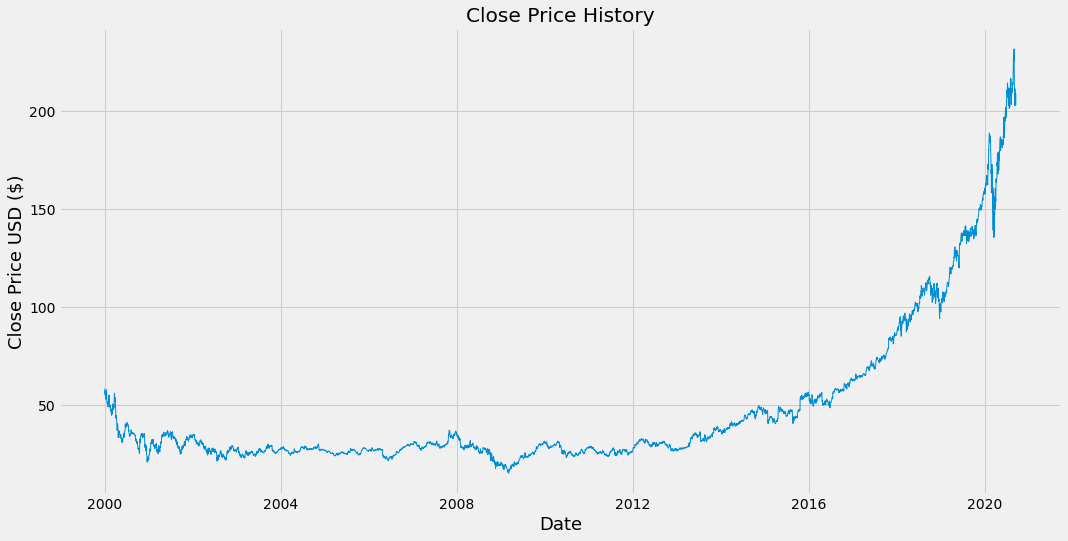

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'],linewidth =1)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])#Converting the dataframe to a numpy array
dataset = data.values#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
dataset

array([[ 58.28125   ],
       [ 56.3125    ],
       [ 56.90625   ],
       ...,
       [208.77999878],
       [205.05000305],
       [202.91000366]])

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.19922056],
       [0.19012703],
       [0.19286952],
       ...,
       [0.89436492],
       [0.8771363 ],
       [0.86725177]])

In [ ]:
#training the data on a time step period of over 2 months i.e 60 days

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len,: ]#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(4109, 60)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=60, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Bidirectional(LSTM(50,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(LSTM(50,return_sequences=False)))
model.add(Dense(units=25))
model.add(Dense(units=1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=100, epochs=15)

Epoch 1/15
42/42 [==============================] - 8s 184ms/step - loss: 8.0863e-04
Epoch 2/15
42/42 [==============================] - 8s 183ms/step - loss: 7.0600e-05
Epoch 3/15
42/42 [==============================] - 8s 183ms/step - loss: 4.8734e-05
Epoch 4/15
42/42 [==============================] - 8s 184ms/step - loss: 4.2476e-05
Epoch 5/15
42/42 [==============================] - 8s 184ms/step - loss: 3.8153e-05
Epoch 6/15
42/42 [==============================] - 8s 184ms/step - loss: 4.2269e-05
Epoch 7/15
42/42 [==============================] - 8s 184ms/step - loss: 3.3829e-05
Epoch 8/15
42/42 [==============================] - 8s 185ms/step - loss: 3.1686e-05
Epoch 9/15
42/42 [==============================] - 8s 184ms/step - loss: 3.0491e-05
Epoch 10/15
42/42 [==============================] - 8s 185ms/step - loss: 2.7771e-05
Epoch 11/15
42/42 [==============================] - 8s 184ms/step - loss: 3.6866e-05
Epoch 12/15
42/42 [==============================] - 8s 185ms/s

<function matplotlib.pyplot.show>

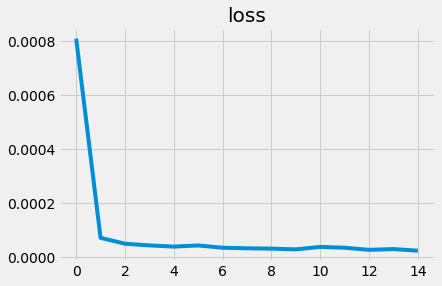

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
training_data_len

4169

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
y_test.shape

(1042, 1)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

6.170972350890437

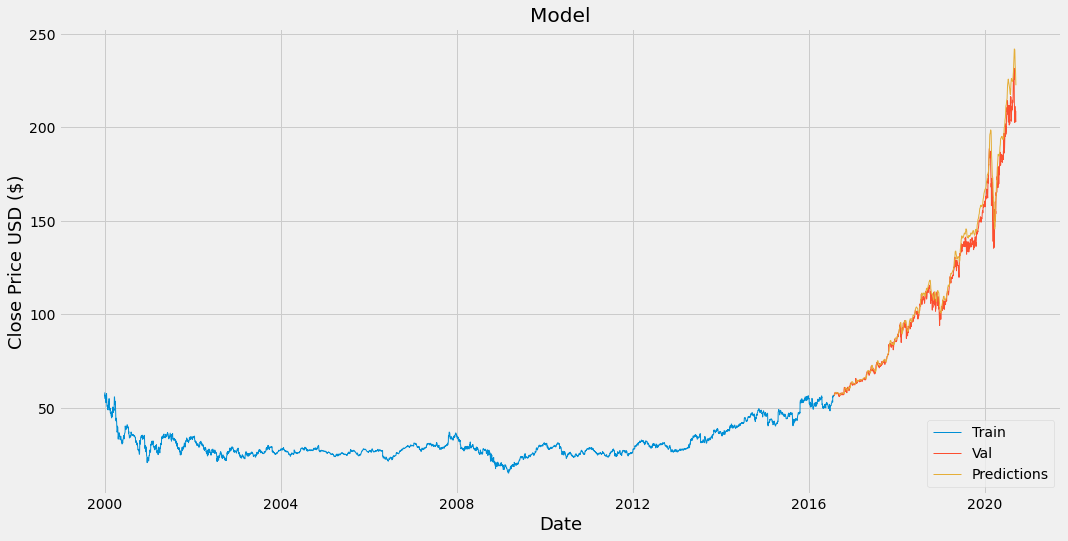

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'],linewidth =1)
plt.plot(valid[['Close', 'Predictions']],linewidth =1)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2016-07-29,56.680000,56.856873
2016-08-01,56.580002,57.016682
2016-08-02,56.580002,57.105995
2016-08-03,56.970001,57.138649
2016-08-04,57.389999,57.164108
...,...,...
2020-09-11,204.029999,233.377518
2020-09-14,205.410004,230.009354
2020-09-15,208.779999,226.917694
